<a href="https://colab.research.google.com/github/rajat10-01/Image-processing-project/blob/master/Traffic_Signal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#cloning repo containing the traffic sign dataset
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [3]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [4]:
df = pd.read_csv('german-traffic-signs/signnames.csv')

In [5]:
df

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [6]:
with open("german-traffic-signs/train.p" ,mode='rb') as training:
  train = pickle.load(training)

with open("german-traffic-signs/valid.p" ,mode='rb') as validation:
  valid = pickle.load(validation)

with open("german-traffic-signs/test.p" ,mode='rb') as testing:
  test = pickle.load(testing)

In [7]:
xtrain, ytrain = train['features'], train['labels']
xvalid, yvalid = valid['features'], valid['labels']
xtest, ytest = test['features'], test['labels']

In [8]:
print(xtrain.shape)
print(xvalid.shape)
print(xtest.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


image label=10


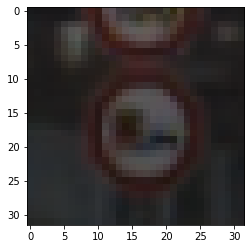

In [9]:
index = np.random.randint(1,len(xtrain))
plt.imshow(xtrain[index])
print("image label={}".format(ytrain[index]))

In [10]:
from sklearn.utils import shuffle
xtrain, ytrain = shuffle(xtrain, ytrain)

In [11]:
def preprocessing(img): 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img = cv2.equalizeHist(img) 
    img = img / 255
    return img

In [12]:
xtrainp = np.array(list(map(preprocessing, xtrain)))
xvalidp = np.array(list(map(preprocessing, xvalid)))
xtestp = np.array(list(map(preprocessing, xtest)))

In [13]:
xtrainp = xtrainp.reshape(34799, 32, 32, 1) 
xvalidp = xvalidp.reshape(4410, 32, 32, 1) 
xtestp = xtestp.reshape(12630, 32, 32, 1) 

In [14]:
print(xtrainp.shape)
print(xvalidp.shape)
print(xtestp.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


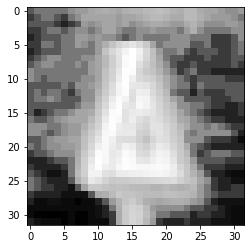

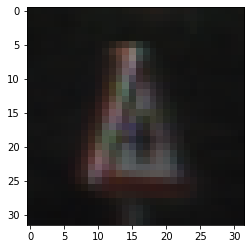

In [15]:
i = random.randint(1, len(xtrain))
plt.imshow(xtrainp[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(xtrain[i].squeeze())

In [16]:
model = Sequential() 
model.add(Conv2D(32, (5, 5), input_shape =(32, 32, 1), activation ='relu'))  
model.add(MaxPooling2D(pool_size =(2, 2))) 
model.add(Dropout(0.25))
model.add(Conv2D(64, (5, 5), activation ='relu'))  
model.add(MaxPooling2D(pool_size =(2, 2))) 
model.add(Flatten()) 
model.add(Dense(256, activation ='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(43, activation ='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               4

In [17]:
#compile the model
model.compile(Adam(lr = 0.001), loss ='sparse_categorical_crossentropy', metrics =['accuracy']) 

In [18]:
history = model.fit(xtrainp, ytrain, batch_size=500, epochs= 50, verbose=1, validation_data=(xvalidp, yvalid))

Epoch 1/50
70/70 [==============================] - 54s 764ms/step - loss: 2.8344 - accuracy: 0.2529 - val_loss: 1.6297 - val_accuracy: 0.5481
Epoch 2/50
70/70 [==============================] - 53s 761ms/step - loss: 1.2325 - accuracy: 0.6309 - val_loss: 0.6936 - val_accuracy: 0.8082
Epoch 3/50
70/70 [==============================] - 53s 759ms/step - loss: 0.7017 - accuracy: 0.7855 - val_loss: 0.4475 - val_accuracy: 0.8658
Epoch 4/50
70/70 [==============================] - 54s 768ms/step - loss: 0.4726 - accuracy: 0.8557 - val_loss: 0.3629 - val_accuracy: 0.8971
Epoch 5/50
70/70 [==============================] - 53s 758ms/step - loss: 0.3570 - accuracy: 0.8905 - val_loss: 0.2843 - val_accuracy: 0.9109
Epoch 6/50
70/70 [==============================] - 53s 757ms/step - loss: 0.2855 - accuracy: 0.9111 - val_loss: 0.2408 - val_accuracy: 0.9302
Epoch 7/50
70/70 [==============================] - 53s 761ms/step - loss: 0.2364 - accuracy: 0.9292 - val_loss: 0.2174 - val_accuracy: 0.9329

In [19]:
score = model.evaluate(xtestp, ytest)
print("Test accuracy", score[1])

395/395 [==============================] - 5s 14ms/step - loss: 0.2287 - accuracy: 0.9500
Test accuracy 0.9500395655632019


In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epochs')

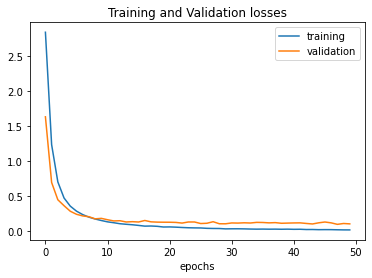

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation losses')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

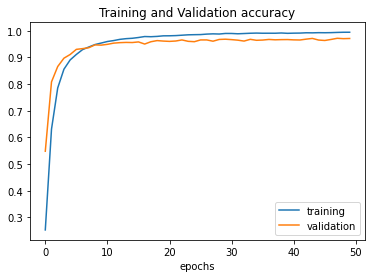

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epochs')

In [23]:
prediction = model.predict_classes(xtestp)
ytruelabel = ytest

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


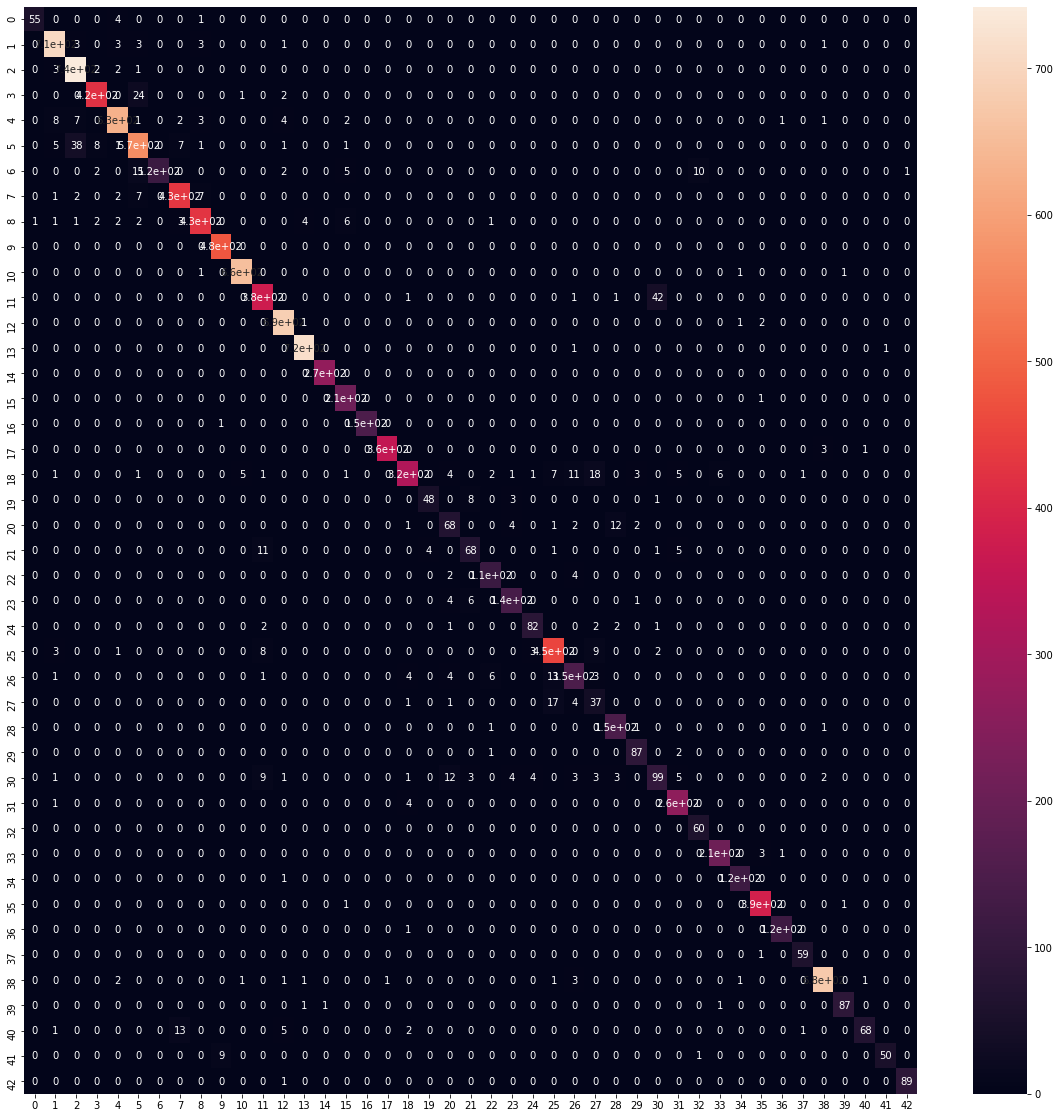

In [24]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(ytruelabel, prediction)
plt.figure(figsize=(20, 20))
sns.heatmap(matrix, annot=True)

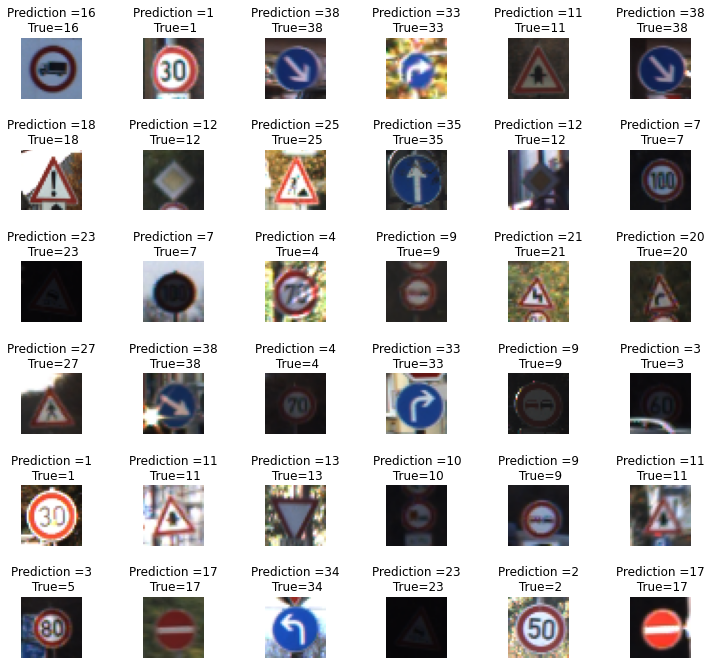

In [25]:
L = 6
W = 6
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()
for i in range(0, L*W):
  axes[i].imshow(xtest[i])
  axes[i].set_title('Prediction ={}\n True={}'.format(prediction[i], ytruelabel[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)

In [26]:
model.save('my_model.h5')